In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv('data/data1.csv')
data2 = pd.read_csv('data/data2.csv')
data3 = pd.read_csv('data/data3.csv')
data4 = pd.read_csv('data/data4.csv')

In [4]:
data = pd.concat([data1, data2, data3, data4])

In [5]:
data.columns

Index(['taget', 'rssi', 'A1', 'P1', 'A2', 'P2', 'A3', 'P3', 'A4', 'P4',
       ...
       'A48', 'P48', 'A49', 'P49', 'A50', 'P50', 'A51', 'P51', 'A52', 'P52'],
      dtype='object', length=106)

In [6]:
data['taget'].unique()

array(['applause', 'go', 'jump', 'wave'], dtype=object)

In [7]:
x_df = data.drop(columns=['taget'])
y_df = data.pop('taget')

In [8]:
y_df.shape

(1442,)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df,y_df, random_state=1)

In [10]:
X_train.shape

(1081, 105)

In [11]:
Y_train.shape

(1081,)

In [12]:
X_test.shape

(361, 105)

In [56]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(Y_train)
y_test = encoder.fit_transform(Y_test)

print(y_train.shape)
print(y_test.shape)

(1081,)
(361,)


In [57]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

print(x_train.shape)
print(x_test.shape)

(1081, 105)
(361, 105)


In [104]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(105, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [105]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [117]:
history = model.fit(x_train, y_train,batch_size = 2, epochs= 100, validation_data=(x_test, y_test))

Epoch 1/100
541/541 [==============================] - 1s 1ms/step - loss: 0.2577 - accuracy: 0.9140 - val_loss: 0.4075 - val_accuracy: 0.8476
Epoch 2/100
541/541 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9130 - val_loss: 1.2262 - val_accuracy: 0.6066
Epoch 3/100
541/541 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9001 - val_loss: 0.6068 - val_accuracy: 0.7978
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.9029 - val_loss: 1.2919 - val_accuracy: 0.6454
Epoch 5/100
541/541 [==============================] - 1s 1ms/step - loss: 0.2760 - accuracy: 0.9038 - val_loss: 0.9498 - val_accuracy: 0.6427
Epoch 6/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3073 - accuracy: 0.8797 - val_loss: 0.3904 - val_accuracy: 0.8421
Epoch 7/100
541/541 [==============================] - 1s 1ms/step - loss: 0.2164 - accuracy: 0.9121 - val_loss: 0.5551 - val_accuracy: 0.7895

In [111]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 105)               11130     
                                                                 
 dense_42 (Dense)            (None, 64)                6784      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 4)                 132       
                                                                 
Total params: 20,126
Trainable params: 20,126
Non-trainable params: 0
_________________________________________________________________


In [121]:
accuracy = history.history['accuracy']

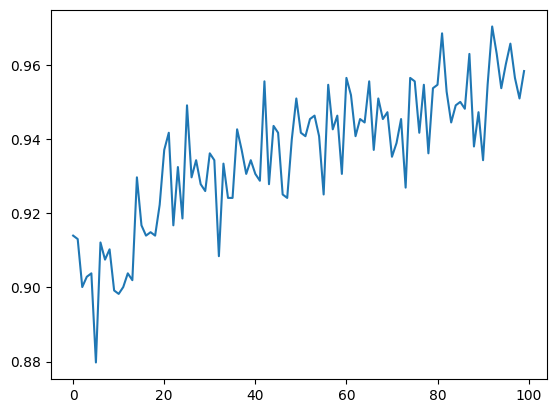

In [122]:
plt.plot(accuracy)